### Ковальчук Алексей

- telegram: @analitiqq
- instagram: @analitiq
- web-site: http://analitiq.ru

Эта программа будет использовать "recurent neural network called Long Short Term Memory (LSTM)" для построения прогноза, Будем использовать последние 60 дней для этого.

In [1]:
#import библиотек
import yfinance as yf
import yahoofinancials
import math 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # специальное отображение графиков для pyplot

Using TensorFlow backend.


In [2]:
AAPL = yf.download('AAPL', 
                      start='2015-01-01', 
                      end='2020-06-06', 
                      progress=False)
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,112.820000,113.129997,110.209999,110.379997,100.905785,41403400
2015-01-02,111.389999,111.440002,107.349998,109.330002,99.945885,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.130241,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.139420,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.501518,40105900
...,...,...,...,...,...,...
2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800
2020-06-02,320.750000,323.440002,318.929993,323.339996,323.339996,21910700
2020-06-03,324.660004,326.200012,322.299988,325.119995,325.119995,26122800


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


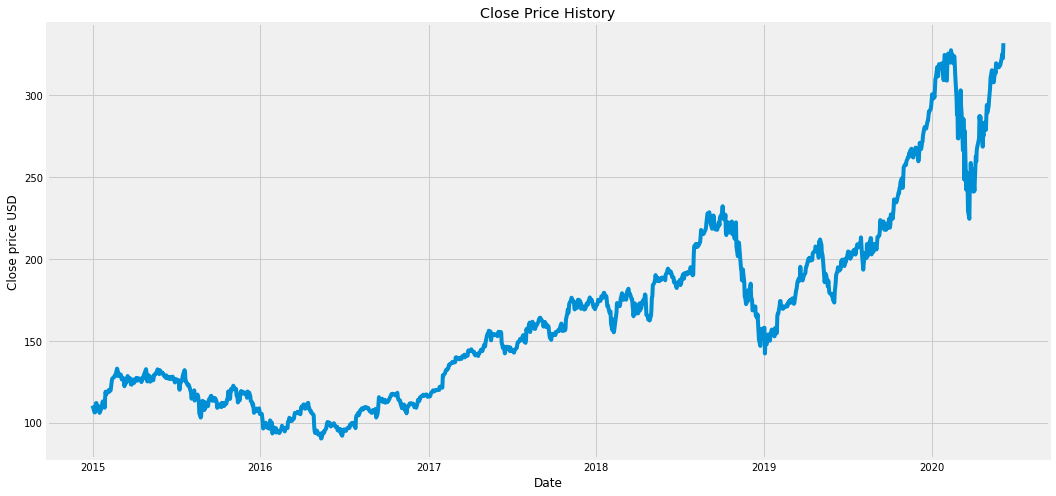

In [3]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date')
plt.ylabel('Close price USD')
plt.show()

In [4]:
# Создаем новый датафрейм только с колонкой "Close"
data = AAPL.filter(['Close'])
# преобразовываем в нумпаевский массив
dataset = data.values
# Вытаскиваем количество строк в дате для обучения модели (LSTM)
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1094

In [5]:
#Scale the data (масштабируем)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 

scaled_data

array([[0.08309836],
       [0.07874442],
       [0.06597281],
       ...,
       [0.97354451],
       [0.96193402],
       [1.        ]])

In [6]:
# Создаем датасет для обучения
train_data = scaled_data[0:training_data_len]
# разбиваем на x underscore train и y underscore train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [7]:
#Конвертируем x_train и y_train в нумпаевский массив
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2]))

In [9]:
#Строим нейронку
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Компилируем модель
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [13]:
#Тренируем модель
model.fit(x_train,y_train,batch_size = 1, epochs = 10)

Epoch 1/10
1034/1034 [==============================] - 39s 38ms/step - loss: 7.4031e-04
Epoch 2/10
1034/1034 [==============================] - 44s 42ms/step - loss: 5.0496e-04
Epoch 3/10
1034/1034 [==============================] - 43s 42ms/step - loss: 3.9363e-04
Epoch 4/10
1034/1034 [==============================] - 43s 41ms/step - loss: 3.3017e-04
Epoch 5/10
1034/1034 [==============================] - 41s 40ms/step - loss: 2.6473e-04
Epoch 6/10
1034/1034 [==============================] - 42s 40ms/step - loss: 3.0185e-04
Epoch 7/10
1034/1034 [==============================] - 40s 38ms/step - loss: 2.2037e-04
Epoch 8/10
1034/1034 [==============================] - 39s 38ms/step - loss: 2.0841e-04
Epoch 9/10
1034/1034 [==============================] - 40s 39ms/step - loss: 2.3383e-04
Epoch 10/10
1034/1034 [==============================] - 40s 39ms/step - loss: 2.6745e-04


In [14]:
#Создаем тестовый датасет
test_data = scaled_data[training_data_len - 60:]
#по аналогии создаем x_test и y_test 
x_test = []
y_test = dataset[training_data_len:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i])

In [15]:
#опять преобразуем в нумпаевский массив
x_test = np.array(x_test)

In [16]:
#опять делаем reshape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))

In [17]:
#Получаем модель предсказывающую значения
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Получим mean squared error (RMSE) - метод наименьших квадратов
rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.451553624191564

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


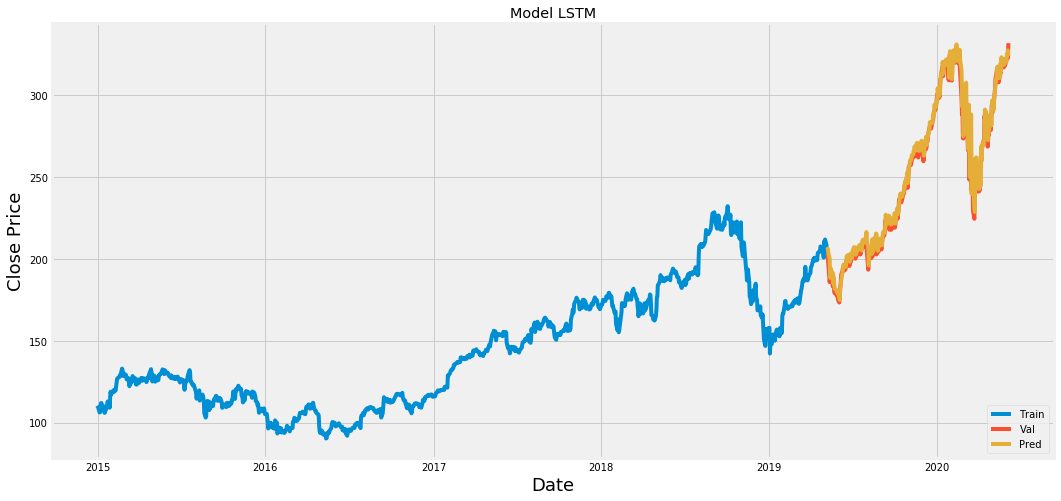

In [19]:
#Строим график
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions
#Визуализируем
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Pred'], loc = 'lower right')
plt.show()